# Etivity 1: _Exploratory Data Analysis (EDA)_
**Student Name**: _Sean Morrissey_

**Student ID**: _17222761_

## Part 1: Formulate a particular question that might be interesting to answer by exploring this dataset

The goal and purpose of EDA (Exploratory Data Analysis) in this Etivity is to investigate the impacts of varying communication factors and answer the question of "What effects does the number of times a client has previously been approached have on the subscription rate along with the method of contact?". It is important to explore the correlation between these variables (if any), as it could aid in the classification process in machine learning to determine whether a client subscribed or not. 

The answer to this question could provide beneficial information to the marketing campaigners as it could highlight whether the medium in which they communicate through (i.e. cellular or telephone) and whether new clients or previously contacted clients can improve the subscription rate and therefore be implemented into their approach.

*For the investigation of this research question `duration` will not be taken into account as it has already been proven to have a direct correlation and impact on subscription rates*

In [1]:
# Import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read in the dataset into a pandas dataframe
df = pd.read_csv('./bank.csv')

In [3]:
# Check the dimensions of the dataframe
df.shape

(2000, 17)

In [4]:
# Check the first 5 rows of the dataframe
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,yes,no,cellular,1,apr,479,1,307,1,failure,no


In [5]:
# Check the first 5 rows of the dataframe
df.tail(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,secondary,no,6403,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


On observation we can see that the dataset contains 2000 rows and 17 columns of various features. The data in the dataset is comprised of both categorical data and numerical data. 

The `subscribed` feature can be considered the primary attribute of the dataset in which the other features can contribute to the value of this feature. This `subscribed` feature can be defined as a desired target / output variable of the dataset and can be considered to be the classification goal to predict the value of this feature based on another variable x.

In [6]:
# Check the data types of the attributes in the dataframe
df.dtypes

age           float64
job            object
marital        object
education      object
default        object
balance         int64
housing        object
loan           object
contact        object
day             int64
month          object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
subscribed     object
dtype: object

Inspecting the datatypes of the features in the dataset shows that we have 10 `object` fields which can be classed as categorical data. The remaining 1 `float64` and 6 `int64` features make up the numerical data.



## Part 2: Calculate statistics for the numerical and categorical attributes

##### Statistics for the numerical attributes

In [7]:
# Describe numerical data
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,1988.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,41.753018,1413.663500,13.851500,292.020500,1.909500,167.896000,2.561500
std,12.724358,3131.224213,9.712189,221.557295,1.378862,131.754126,3.400735
min,18.000000,-980.000000,1.000000,7.000000,1.000000,-1.000000,0.000000
25%,32.000000,201.500000,5.000000,146.000000,1.000000,75.750000,1.000000
50%,38.000000,551.000000,12.000000,236.000000,1.000000,182.000000,2.000000
75%,50.000000,1644.500000,23.000000,379.000000,2.000000,251.000000,3.000000
max,93.000000,81204.000000,31.000000,1823.000000,11.000000,854.000000,55.000000


From producing the statistics for all of the numerical attributes we can see that the `age` feature is missing 12 values (2000 - 1988). This could be potentially accredited to clients refusing to tell their age. The rest of the attributes contain values for all 2000 rows.

The main information which can be conveyed from the investigation of the numerical statistics is the skew/spread of the data. From this we are able to define where most of the data lies. The skew of the data can be defined by the comparison of the mean vs the median (right skewed - mean > median, left skewed - median > mean).

The skew of all the numerical data above can be defined as right skewed bar the attribute `pdays` which is the only left skewed attribute meaning most of the data lies towards the end of the data. This is due to unknown `pdays`values being set to -1 and therefore bringing down the mean of the data. 

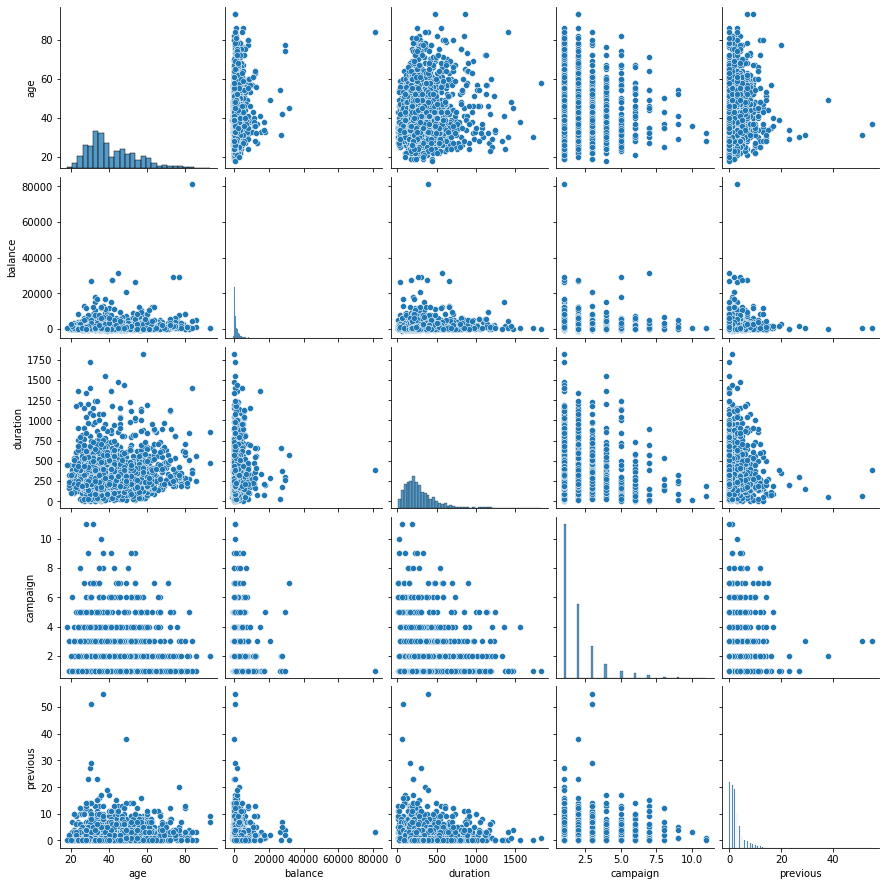

In [8]:
# Create a pairplot for important numerical attributes
sns.pairplot(data=df[['age','balance','duration', 'campaign', 'previous']].dropna())
plt.show()

The above pair plots confirms the previous observation made about the skew of data and provides evidence that they are indeed right skewed. Looking at the `previous` attribute (the primary numerical attribute in consideration for this notebook) we can see that:
- Typically the more a client was contacted the younger (`age`) they were (some outliers are present).
- Clients who were contacted more times have a lower `balance` than those contacted less times.
- The more times a client was previously contacted, the shorter the `duration` of the call was.
- The more times a client was previously contacted, the less they were contacted on this marketing `campaign`.

##### Statistics for the categorical attributes

In [9]:
# Describe categorical data
df.describe(exclude=[np.number])

,job,marital,education,default,housing,loan,contact,month,poutcome,subscribed
count,1990,2000,1896,2000,2000,2000,1809,2000,1546,2000
unique,11,3,3,2,2,2,2,12,3,2
top,management,married,secondary,no,no,no,cellular,feb,failure,yes
freq,461,1111,995,1985,1037,1750,1663,404,955,1000


In contrast to the numerical data from the dataset, the categorical data is missing more values for its attributes. This could be potentially accredited to clients not willing to give this information away or this information not being available. 

Notably the `subscribed` attribute is split with half of the population not subscribing and the other half subscribing. Although the `subscribed` feature is categorical data it could also easily be represented as a binary numerical data (0 = no, 1 = yes).

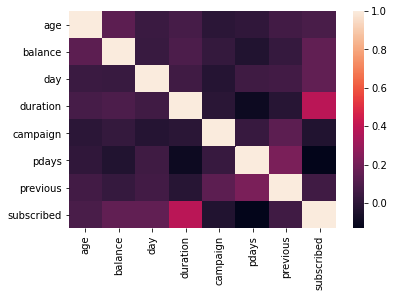

In [10]:
# Add in subscribed to the heat map temporarily to see correlations
dupe_df = pd.read_csv('./bank.csv')
dupe_df['subscribed'] = dupe_df['subscribed'].replace("no", 0)
dupe_df['subscribed'] = dupe_df['subscribed'].replace("yes", 1)
sns.heatmap(dupe_df.corr());

If we were to treat said feature as a numerical feature then we can see from the above heat map that the `previous` feature has a correlation greater than 0 with the `subscribed` feature. This means that the numerical `previous` data can have a possible impact on whether a client subscribed or not. This idea will be investigated further through the use of various plotting techniques.

Also, as noted in the dataset website, `duration` has the highest correlation and impact on the `subscribed` feature.

*For the purpose of EDA in this Etivity `subscribed` will remain as a categorical attribute*

## Part 3: Two different plotting techniques to plot the distribution of some numerical attribute

##### Histogram of `previous`

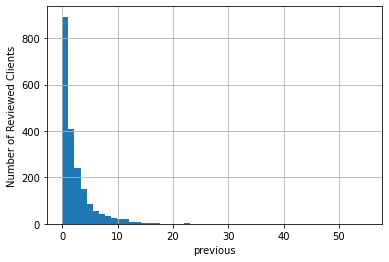

In [11]:
# Plot a histogram of previous
df['previous'].hist(bins=50)
plt.xlabel('previous')
plt.ylabel('Number of Reviewed Clients')
plt.show()

The histogram above confirms our earlier hypothesis of the skew being a right skew for the `previous` attribute. The use of 50 bins allows us to clearly see this distribution.

It also shows the presence of outliers in the data with the majority of data lying between 0-5 contacts for `previous` campaigns.

##### Boxplot of `previous`

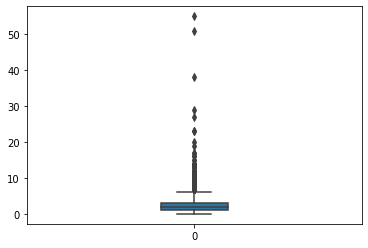

In [12]:
# Plot a boxplot using seaborn for previous
sns.boxplot(data=df['previous'], orient='v', width=0.2)
plt.show()

The boxplot for `previous` also makes it visible that the data for `previous` contains a large amount of outliers, these attributed could potentially be attributed to a possibility that people who were contacted for previous campaigns, subscribing to those campaigns and so are contacted again for new campaigns as they could potentially be more likely to subscribe to said new campaigns.

*This will be investigated further in part 4*

We can see from the box plot above that the data between the first quartile and the median has a dense spread (i.e. data is closer together) while the median to the third quartile is slightly more distributed but still can be considered dense.

## Part 4: Generate two plots with the combined distribution of attributes

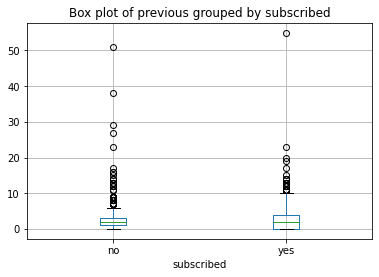

In [13]:
# Boxplot of previous, grouped by the categorical attribute 'subscribed'
df.boxplot(column='previous', by='subscribed')
plt.title('Box plot of previous grouped by subscribed')
plt.suptitle("")
plt.show()

The key takeaway from the boxplot above is that it shows that the median of clients who agreed to subscribe is slightly higher than the median of clients who did not subscribe. This shows that previpus conversations with clients has an effect on the subscription rate. 

The outliers in duration of people who subscribed are also in a higher bracket than the outliers of those who did not subscribe, further contributing to this factor that longer conversations are more effective.

Also suprisingly the first quartile of the clients who subscribed is lower than those who did not, showing that newer clients who were previously not contacted were more likely to subscribe than not subscribe.

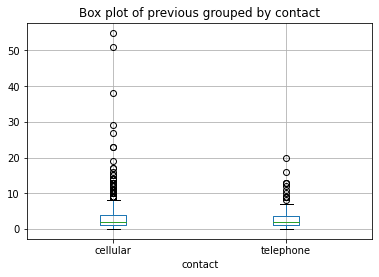

In [14]:
# Boxplot of previous, grouped by the attribute 'contact'
df.boxplot(column='previous', by='contact')
plt.title('Box plot of previous grouped by contact')
plt.suptitle("")
plt.show()

From the boxplot above we can see that the means between the number of times clients have been previously contacted about seperate campaign do not differ greatly but we can see that the great majority of the outliers have been contacted by cellular means. This means the outliers in which people have been contacted about previous marketing campaigns are more likely to be contacted by cellular and less likely to be contacted by telephone.

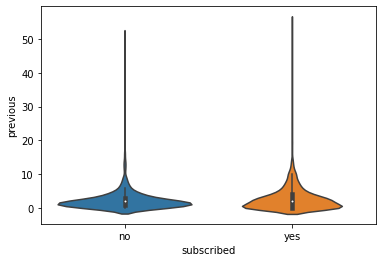

In [15]:
# Violinplot of previous, grouped by subscribed
sns.violinplot(data=df, x='subscribed', y='previous')
plt.show()

The above graph shows that the clients who had previously been contacted and did not subscribe have a much more denser distribution than those who did subcribe. The people who did subscribe have a wider distribution and we can see that people who have been contacted about previous campaigns (>5, closer to 10) are more likely to subscribe.

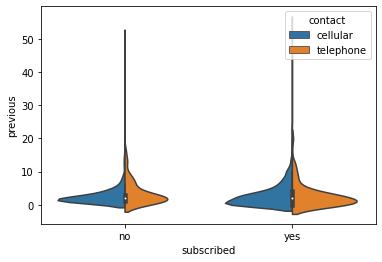

In [16]:
# Violinplot of previous, grouped by subscribed and contact
sns.violinplot(data=df, x='subscribed', y='previous', hue='contact', split=True)
plt.show()

The first thing to note from the above graph is that people who were contacted by telephone and did not subscribe have a more even distribution than those who did not subscribe and were contacted by cellular.

The people who subscribed by cellular are evenly distributed and the distribution is similar to those who were contacted by telephone.

The distribution of people who were contacted by telephone who did and did not subscribe are similar but the people who said yes being at a much larger scale. This shows that people are more likely to subscribe when contacted by telephone than not subscribe. The same can be said about cellular.

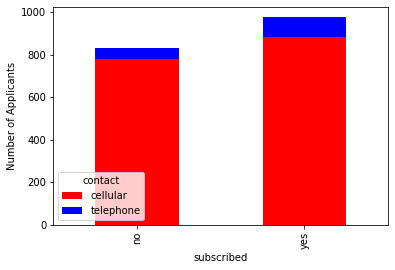

In [17]:
# Stackchart of subscribed and contact
crosstab_CL = pd.crosstab(df['subscribed'], df['contact'])
crosstab_CL.plot(kind='bar', stacked=True, color=['red', 'blue'])
plt.ylabel('Number of Applicants')
plt.show()

The stackchart above backs up the previous point as it shows that for telephone, more people subscribed than did not and for cellular more people subscribed than did not. 

Although it must be noted that we do not know for 191 clients how they were contacted.

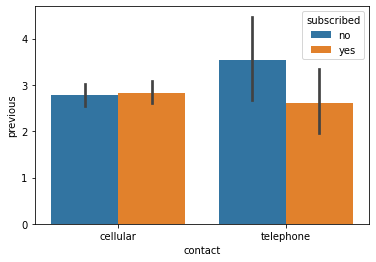

In [18]:
# Barplot of previous groubed by subscribed and contact
sns.barplot(hue = 'subscribed', x = 'contact', y= 'previous', data=df);

The above barplot shows that people who were contacted by cellular and subscribed were contacted more about previous market campaigns than those who were contacted by cellular and did not subscribe.

The opposite is the case for telephone, as people who did not subscribe were contacted about previous campaigns more than those who subscribed.

It would be better to ring people who have been contacted previously about other campaigns by cellular and those who have not been previously contacted about other campaigns as much by telephone.